<a href="https://colab.research.google.com/github/ekourkchi/codeLAB/blob/master/F_inclination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import os
import random
from matplotlib import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

#################################################################
def add_axis(ax, xlim, ylim):
    
    x1, x2 = xlim[0], xlim[1]
    y1, y2 = ylim[0], ylim[1]
    ax.set_xlim(x1, x2)
    ax.set_ylim(y1, y2)

    ax.minorticks_on()
    ax.tick_params(which='major', length=7, width=1.5, direction='in')
    ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')     
    
    # additional Y-axis (on the right)
    y_ax = ax.twinx()
    y_ax.set_ylim(y1, y2)
    y_ax.set_yticklabels([])
    y_ax.minorticks_on()
    y_ax.tick_params(which='major', length=7, width=1.5, direction='in')
    y_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')

    # additional X-axis (on the top)
    x_ax = ax.twiny()
    x_ax.set_xlim(x1, x2)
    x_ax.set_xticklabels([])
    x_ax.minorticks_on()
    x_ax.tick_params(which='major', length=7, width=1.5, direction='in')
    x_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')
    
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
################################################################# 
### inc [deg]
def F(inc, q2):
    
    inc = inc*np.pi/180.
    
    b_a2 = (1.-q2)*(np.cos(inc))**2+q2
    a_b = np.sqrt(1./b_a2)
    
    return np.log10(a_b)
################################################################# 


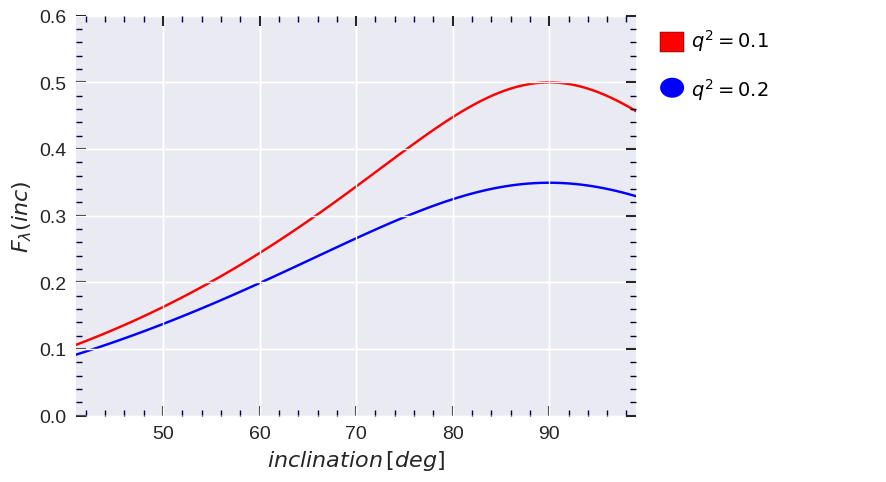

In [5]:
inc = np.linspace(40,100,100)
y1 = F(inc, 0.1)
y2 = F(inc, 0.2)

# Defininf the convas size
fig = plt.figure(figsize=(8, 4), dpi=100)

## First axis only covers 70% of the convas along the x-axis
ax = plt.axes([0,0,0.7,1])
ax.plot(inc, y1, color='red')
ax.plot(inc, y2, color='blue')
ax.set_xlabel(r'$inclination \/ [deg]$', fontsize=16)
ax.set_ylabel(r"$F_\lambda(inc)$", fontsize=16)
add_axis(ax, [41,99],[0,0.6])     ## axis limits, and adding additional thickmark on top and right sides
                                  ## and taking care of font size and other things    

## second axis covers the entire convas, but its transparent
ax2 = plt.axes([0,0,1,1])
ax2.set_axis_off()  
ax2.set_xticks([])
ax2.set_yticks([])
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')

## The first tupple shows the coordiantes of the patches and texts in units of figure dimension fractions (0-->1)
ax2.annotate(r"$q^2 = 0.1 $", (0.78,0.9), xycoords='figure fraction', size=14, color='black')
ax2.annotate(r'$q^2=0.2$', (0.78,0.8), xycoords='figure fraction', size=14, color='black')
ax2.add_patch(patches.Rectangle((0.73, 0.91), 0.03, 0.05, facecolor='red', edgecolor='black'))
ax2.add_patch(patches.Ellipse((0.745, 0.82), 0.03, 0.05, facecolor='blue'))